In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = r"https://raw.githubusercontent.com/nahdarantung/Thesis/refs/heads/main/All%20Data%20with%20MnO2%20pour%20density%20and%20surface%20area%20(paper).csv"
df = pd.read_csv(path)

X = df.drop(columns=['Max Current', 'Capacity'])
y = df['Capacity']

df = pd.concat([X, y], axis=1)

from pycaret.regression import *

exp = setup(data = df, target = 'Capacity', session_id=123, verbose=False)
model = compare_models(exclude=['catboost'])
evaluate_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,0.7381,1.6134,0.9782,0.7637,0.1745,1.6755,0.0100
gbr,Gradient Boosting Regressor,0.8054,1.7666,1.0227,0.7378,0.2173,5.0782,0.0110
rf,Random Forest Regressor,0.7412,1.7529,0.9800,0.6736,0.1958,3.9432,0.0170
et,Extra Trees Regressor,0.7474,1.9764,1.0175,0.6402,0.1712,1.2627,0.0140
omp,Orthogonal Matching Pursuit,1.0026,3.3464,1.4056,0.4910,0.2200,1.1527,0.0050
br,Bayesian Ridge,1.2078,3.6561,1.5199,0.2283,0.4430,12.7730,0.0050
lasso,Lasso Regression,1.1805,3.8156,1.5135,0.1587,0.4393,12.1449,0.0050
llar,Lasso Least Angle Regression,1.1805,3.8156,1.5135,0.1587,0.4392,12.1444,0.0040
knn,K Neighbors Regressor,2.1605,7.5939,2.5854,0.0981,0.7843,31.3014,0.0070
en,Elastic Net,1.1862,4.1402,1.5215,-0.0312,0.4304,11.1795,0.0050


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_cleaned = df.dropna()

X = df_cleaned.drop(columns=['Capacity'])
y = df_cleaned['Capacity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=123)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

df_train_combined = pd.DataFrame(X_train, columns=X.columns)
df_train_combined['Capacity'] = y_train.values

df_test_combined = pd.DataFrame(X_test, columns=X.columns)
df_test_combined['Capacity'] = y_test.values

exp = setup(data = df_train_combined, target = 'Capacity', session_id=123, verbose=False)
model = compare_models(exclude=['catboost'])
evaluate_model(model)

X_train shape: (52, 12), X_test shape: (6, 12)
y_train shape: (52,), y_test shape: (6,)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.9986,2.6348,1.3769,0.5445,0.2554,2.8303,0.0080
omp,Orthogonal Matching Pursuit,1.3548,4.5724,1.7456,0.4970,0.3305,4.8413,0.0040
et,Extra Trees Regressor,0.9638,2.2693,1.3152,0.2675,0.1902,0.7103,0.0130
knn,K Neighbors Regressor,1.1507,2.9431,1.5276,0.2429,0.2644,1.3274,0.0060
llar,Lasso Least Angle Regression,1.5924,5.5264,1.9468,0.2176,0.5059,4.8883,0.0050
lasso,Lasso Regression,1.5925,5.5267,1.9469,0.2175,0.5060,4.8883,0.0050
en,Elastic Net,1.4843,4.9127,1.8579,0.1834,0.4810,4.7981,0.0050
huber,Huber Regressor,1.4581,4.2437,1.8337,0.1793,0.4549,6.7466,0.0060
br,Bayesian Ridge,1.4970,4.4576,1.9058,0.0731,0.4963,8.1011,0.0050
rf,Random Forest Regressor,1.0318,2.9592,1.4701,-0.0723,0.2389,2.2384,0.0160


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.7743,0.8553,0.9248,0.8587,0.4866,60.5592


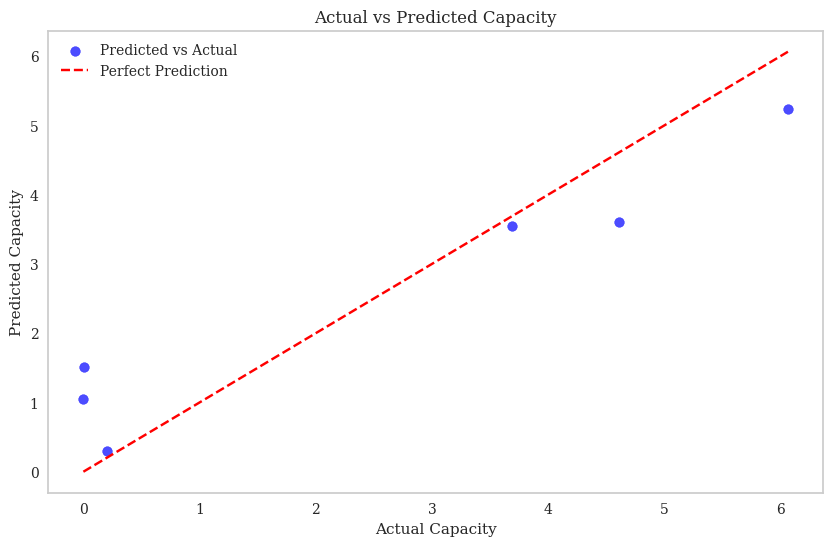

In [13]:
y_pred = predict_model(model, data=df_test_combined)
df_test_combined['Predicted Capacity'] = y_pred['prediction_label']

plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})
plt.scatter(df_test_combined['Capacity'], df_test_combined['Predicted Capacity'], color='blue', alpha=0.7, label='Predicted vs Actual')
plt.plot([df_test_combined['Capacity'].min(), df_test_combined['Capacity'].max()],
         [df_test_combined['Capacity'].min(), df_test_combined['Capacity'].max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Capacity')
plt.ylabel('Predicted Capacity')
plt.title('Actual vs Predicted Capacity')
plt.legend()
plt.grid(False)
plt.show()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.4073,1.4371,1.1988,0.8709,0.3441,3.5764


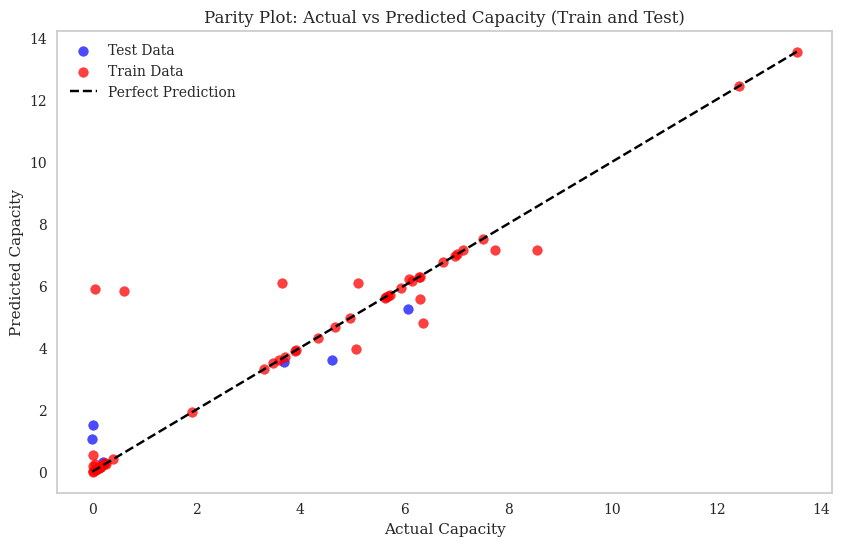

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df_test_combined['Capacity'], df_test_combined['Predicted Capacity'], color='blue', alpha=0.7, label='Test Data')
plt.scatter(df_train_combined['Capacity'], predict_model(model, data=df_train_combined)['prediction_label'], color='red', alpha=0.75, label='Train Data')
plt.plot([min(df_test_combined['Capacity'].min(), df_train_combined['Capacity'].min()), 
          max(df_test_combined['Capacity'].max(), df_train_combined['Capacity'].max())],
         [min(df_test_combined['Capacity'].min(), df_train_combined['Capacity'].min()), 
          max(df_test_combined['Capacity'].max(), df_train_combined['Capacity'].max())],
         color='black', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Capacity')
plt.ylabel('Predicted Capacity')
plt.title('Parity Plot: Actual vs Predicted Capacity (Train and Test)')
plt.legend()
plt.grid(False)
plt.show()

In [15]:
df_test_combined

,AC,CB,G,MnO2,Pour Density,Surface Area,Dry Conductivity,Electrolyte Uptake,Water Uptake,Voltage Drop,Cell Resistance,Wet Conductivity,Capacity,Predicted Max Current,Predicted Capacity
0,2.610464,-1.388022,-1.225312,-1.378405,-0.596576,2.466945,-0.929020,3.166763,3.203333,2.663380,2.404769,-1.057577,0.0000,1.052418,1.052418
1,1.478122,-0.271784,-1.225312,-1.378405,-0.769130,1.345278,-0.456136,0.816350,1.417814,-0.031461,-0.128716,-0.575145,0.2025,0.300856,0.300856
2,-0.560093,-0.197369,0.774807,0.725476,0.404705,-0.493911,-0.172854,-0.651198,-0.540323,-0.612869,-0.478753,0.778218,6.0650,5.238141,5.238141
3,-1.164008,-1.388022,2.621071,-1.378405,-2.158231,-1.321795,0.068626,-0.575281,-0.386474,1.977233,1.500123,-0.997537,0.0050,1.514575,1.514575
4,0.874207,-1.201982,0.351705,0.725476,0.731787,0.932351,-0.852528,1.728019,-0.077880,0.389168,0.006795,-0.945776,4.6150,3.599418,3.599418
5,-0.937540,-1.127566,2.121041,0.725476,0.001922,-0.885248,-0.199013,-0.086277,-0.652918,-0.457658,-0.369398,-0.549740,3.6900,3.546962,3.546962
